In [23]:
%load_ext autoreload
%autoreload 2
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path

from standes.analysis.recorders import get_recorders, get_recorder 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


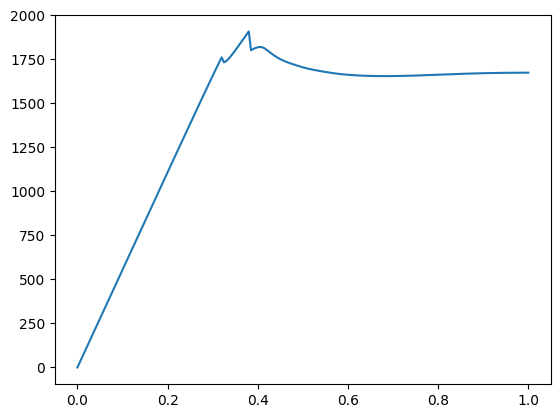

In [24]:
# load results
folder = Path("E:/01_model_verification_analyses/baseshear_recorder")
results_folder = folder / "pushover"

building_height = 10500

with open(results_folder / "po_curve.pickle", "rb") as file:
    po_curve = pickle.load(file)
with open(results_folder / "recorders.pickle", "rb") as file:
    recorders = pickle.load(file)

roof_drift = po_curve[:,0] / building_height * 100
lateral_force = po_curve[:,1] / 1000
plt.plot(roof_drift, lateral_force)

The peak lateral force is substantially larger than the design force. --> Why is this? It is partly due to the use of the expected material strength (1.45fy) and the utilisation ratio (~0.87 in compression and 0.43 in tension). The buckling reduction factor used in design was 0.67. In the model buckling occurs at 0.81 times the tension capacity (much later)

In [39]:
l1_t_brace = np.array(get_recorder(recorders, "section_force", "401010101_1").record["P"]) / 1000
l1_c_brace = np.array(get_recorder(recorders, "section_force", "403010108_5").record["P"]) / 1000 


print(f"Max Compression [kN]: {max(-l1_c_brace):.2f}")
print(f"Max Tension [kN]: {max(l1_t_brace):.2f}")
print(f"Final Tension [kN]: {l1_t_brace[-1]:.2f}")

Max Compression [kN]: 1045.47
Max Tension [kN]: 1289.74
Final Tension [kN]: 1259.65


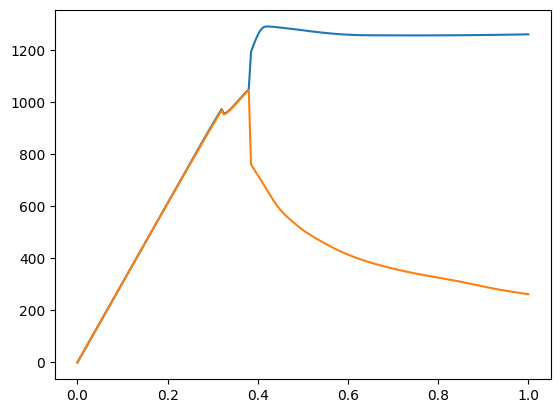

In [26]:
plt.plot(roof_drift, l1_t_brace)
plt.plot(roof_drift, -l1_c_brace)

In [40]:
baseshear_recorder = get_recorder(recorders, "storey_shear", 1, 1)
V_base = -np.array(baseshear_recorder.record[1]) / 1000

Max Baseshear [kN]: 1906.78


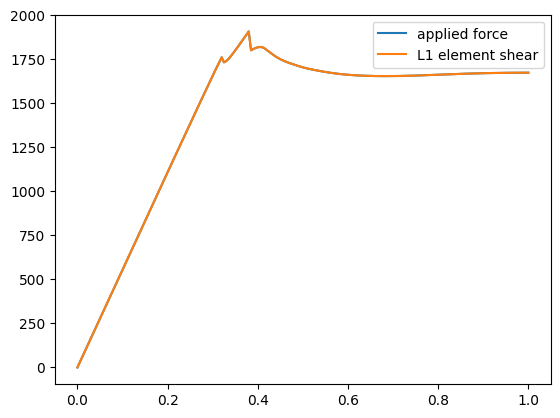

In [47]:
plt.plot(roof_drift, lateral_force, label="applied force")
plt.plot(roof_drift, V_base, label="L1 element shear")
plt.legend()
print(f"Max Baseshear [kN]: {max(V_base):.2f}")

The storey shear obtained from the base of the L1 elements is the same as the total applied force at all steps. We can, therefore, be confident that the base shear recorders are recording the appropriate information reliably. 

Text(0.5, 1.0, 'Components of Baseshear')

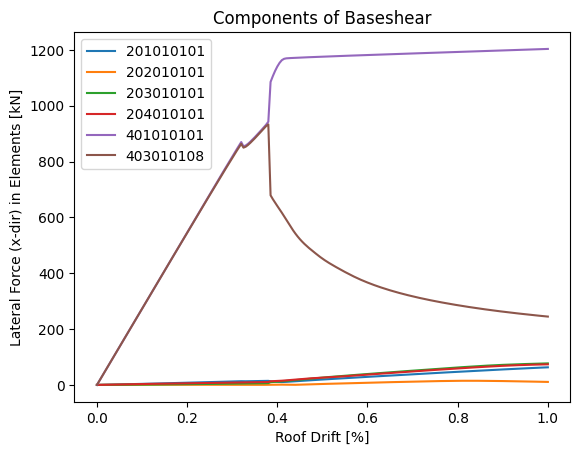

In [46]:
baseshear_recorder_list = baseshear_recorder.recorders

fig = plt.figure()
ax = plt.gca()
for rec in baseshear_recorder_list:
    ax.plot(roof_drift, abs(np.array(rec.record[1]))/1000, label=rec.tag)

ax.legend()
ax.set_ylabel("Lateral Force (x-dir) in Elements [kN]")
ax.set_xlabel("Roof Drift [%]")
ax.set_title("Components of Baseshear")